# Introduction to Two-Sample Hypothesis Testing

### Data Science 410


## Introduction

This note book introduces you to the concepts of classical hypothesis testing. Specifically, this notebook covers **two sample tests for continuous variables**. You may know the two-sample hypothesis tests by the term **A/B tests**.     

But what do we mean by a statistical **hypothesis test**? A statistical hypothesis test determines if the distributions of observations resulting from **different treatments** are **significantly different**. This definition may seem simple, but in fact, encapsulates a lot of complexity. We will focus on some of the most important details in this lesson.     

At the conclusion of this lesson you should be able apply basic classical two-sample hypothesis tests to some common situations.  

![](img/HypothesisCartoon.png)
<center>**Testing a hypothesis**</center>



### Examples of hypothesis tests

Let's consider practical scenario of using hypothesis tests methods. This scenario includes the following steps:

- **Identify a hypothesis that can be tested:** In this example,we want to know if using a larger logo on our web site will drive significantly more traffic. In this case, the **null hypothesis** is that the size of the logo does not matter. 
- **Select a criteria to evaluate the hypothesis:** If our sample has a probability of $<= 10\%$ that chance or randomness alone caused the observed difference we will **reject the null hypothesis** that the logo does not mater. This criteria is known as the **cutoff**. 
- **Select a random sample from the population:** Randomly assign a cookie to new site users that tells the server to show A or B website. One of these web sites is the original, and the other has the larger logo. In statistical terminology we call these two cases **treatments**.  
- **Calculate the test statistic** to compare observations to what we expect to observe. If the test statistic is beyond the cutoff value we say the differences are **significant** and reject the null hypothesis. 

The foregoing seems like a simple recipe, but there are many pitfalls.   
- **Rejecting the null hypothesis does not mean we should accept our proposed alternative**. 
- **Significance simply means the cutoff value has been exceeded, but does not mean the inference is actually important in human terms**. 

We will have more to say about these and other complications latter. 

### Hypothesis testing steps

Let's outline the steps required to perform a formal two-sample hypothesis test. These steps include: 

- We first state our population assumptions in the null hypothesis: $H_0$.
- We state our new alternative hypothesis as an alternative to the null: $H_a$. This is typically stated in terms of a treatment.     
- Decide on a significance level (probability cutoff): 0.1, 0.05, and 0.01 are commonly used. The correct cutoff is problem specific.
- Data is collected for the different treatments. In this case, the treatments are the old web site and the new web site. 
- Compute the statistic and evaluate it based on the cutoff value. 
- Based on our findings we can only do two things:
  - **Reject the null-hypothesis:** This is not the same as accepting the alternative hypothesis.
  - **Fail to reject the null hypothesis:** This is not the same as accepting the null hypothesis. 
- Rejecting the null hypothesis can occur for several reasons, including:   
  - The alternative hypothesis was false to begin with.
  - We did not collect enough evidence for the **size of the effect**. We will explore this aspect of the problem in the **power** discussion. 

## A Simple Cutoff Example

Let's try a simple example of computing a cutoff. We will start by computing the one-sided tail probability of a Normal distribution. In this case we will look at the probability of a the interval from $1.28155$ to infinity of the standard Normal distribution. Execute the code in the cell below and examine the result. 

In [19]:
# One tailed probability
def prob_normal(a, b, mean=0, sd=1):
    import scipy.stats as ss
    return(ss.norm.cdf(b, mean, sd) - ss.norm.cdf(a, mean, sd))
#prob_normal(20.1262055, float('inf'), 15, 4)
prob_normal(1.28155, float('inf'), 0, 1)

0.10000027475074158

The probability of the Normal distribution having a value greater than $1.28155$ is 0.10. This value is then the 0.10 cutoff. **The probability of a value of $1.281$ or greater is 0.10**. 

You can verify that the probability of the entire distribution is 1.0 by executing the code in the cell below.

In [2]:
prob_normal(-float('inf'), float('inf'), 15, 4)

1.0

More typically in hypothesis testing, we set the cutoff and then must determine the value of the statistic. For example, what is the value for a standard Normal at the cutoff probability of 0.10. Execute the code in the cell below to find out. 

In [17]:
def cutoff_stat(alpha, mean=0, sd=1, one_tailed=True):
    from scipy.stats import norm
    if((alpha > 0.0) & (alpha < 1.0)):
        if(one_tailed):
            return(norm.ppf(1.0 - alpha, loc=mean, scale=sd))
        else:
            return(norm.ppf(1.0 - alpha/2.0, loc=mean, scale=sd))
    else:   
        print('alpha must be btween 0 and 1')
cutoff_stat(0.1, mean = 0.0, sd = 1.0)

1.2815515655446004

Not surprisingly the result is $1.28155$. As before, the probability of events of 1.28155 of greater is 0.10. Thus we call the value, $1.28155$, the **critical value**. 

**Your Turn:** find the probability of a standard Normal in the following intervals:
- -1 to 1
- -2 to 2
- -3 to 3

What are the approximate probabilities? What does this result tell you about the probabilities values this extreme or greater. 

## Cutoff for hypothesis tests

Let's consider the cutoff further, in terms of hypothesis tests. In this case we will use the **difference of means** between two distributions as an example. The null hypothesis is that the difference in means is not significantly different. 

As already stated, the cutoff, which we denote $\alpha$, is the probability of observing a **difference of means at least as larger as the critical value**. Conversely, the probability of observing values below the critical value is $1 -\alpha$.        
Graphically we can illustrate the concept of the cutoff for $\alpha = 0.10$ as shown below.

![](img/cutoff.jpg)

If the observed difference of means is greater than the critical value we will **Reject the Null Hypothesis with $90\%$ confidence:**. On the other hand, if the difference is less than the critical value we cannot reject the null hypothesis. 

if the mean of the time spent on the new web page is in the blue region, we can reject the null hypothesis. The difference in means is considered **significant**. 


### How many tails do you have?

The example above is a one-sided hypothesis test. But, there are other alternatives! Could the new web site be worse? Quite possibly! 

In fact, there are **three possibilities** for the tail(s) of the distribution used to evaluate tests. These three cases are shown in the figure.

![](img/tails2.jpg)

The accept-rejection criteria for the null hypothesis for each of these three cases can be characterized:

- **One-tail test with value $\gt$ the cutoff**. The alternative hypothesis is that the mean is significantly less than the null hypothesis.
- **One-tail test with value $\lt$ the cutoff**. The alternative hypothesis is that the mean is significantly greater than the null hypothesis.  
- **Two-tail test with value $\lt\ -cutoff/2$ or $\gt\ cutoff/2$**. The alternative hypothesis is that the mean is significantly different from the null hypothesis. This could mean larger or smaller. Notice that the **cutoff value is divided by two to determine the value for each tail**. 


## What is  the p-value?

Results of hypothesis tests are often reported as a p-value. You must be careful to correctly interpret the p-value. 

- In technical terms, a p-value is the probability of obtaining an effect **at least as extreme** as the one in your sample data, assuming the null hypothesis is true.
For example, for a vaccine study with a p-value of 0.04, you’d obtain the observed difference or more in 4% of studies due to random sampling error.
**P values address only one question: how likely are your data, assuming a true null hypothesis?** 
- **P value does not measure support for the alternative hypothesis!**


### Misuse of p-values

But, watch out! There are many ways to mis-interpret or misuse p-values.

1. The most common mistake: interpreting a P value as the probability of mistakenly rejecting a true null hypothesis (a **type I error**).
  - P values calculations assume the null hypothesis is true for the population and the difference in the sample is entierly from random chance. **P values can not tell you the probability that the null is true or false!** 
  - For the vaccine study, correct and incorrect way to interpret a P value of 0.04:
    * Correct: If vaccine has no effect,  **the observed difference or more arises solely from random sampling error in 4% of studies.**
    * Incorrect: By rejecting the null hypothesis, there’s a 4% chance of Type 1 error.
2. The second common mistake: you can deduce the probability that the alternative hypotheis is correct (e.g. $1.0 - p$, or a **type II error**).  

## A First Example: t-test

The Student t-test is one of the oldest and most widely used classical hypothesis test. Student’s T-test: tests a hypothesis about the difference of two data samples:
- Test whether a population mean has a specified value.
- Test the difference between two means (equal, unknown variances).
- Test a paired-response difference from zero. E.g. a before/after drug treatment on patients.
- Test whether the slope of a line is not zero.
- Test the importance of variables (later in class).
- Use ‘Welch’s T-test’ for testing the difference between two means (unknown variances, potentially different).
- **Picking the different tests changes test’s results.**
- The more assumptions we make, the easier it is to tell the difference between populations.

### Who was Student?

Student was a pseudonym for William Sealy Gosset. Gosset worked for Guinness Company which forbade employees from publishing work. Gosset published the theory of the t-test in 1908 under his pseudonym.  

![](img/Gosset_1908.jpg)
<center>**William Sealy Gosset in 1908**</center>

![](img/gossett.jpg)

<center>**Plaque at site of Gosset's home**</center>

### Why the t-distribution

The differene in means between two Normal distributions with unknown variance follows a t-distribution. The t-distribution has many nice properties including:

- The t-distribution is the natural distribution for tests on means.
- The t-distribution has heavier tails than the Normal and relaxes assumptions on the differences.


###  A first t-test example

As a first example, compare the means of two Normal distributions. Execute the code in the cell below to compute samples from two Normal distributions with slightly different means.

In [24]:
from scipy.stats import norm
import numpy.random as nr
nr.seed(seed=233423)
pop_A = norm.rvs(loc=150, scale=7, size=25)
pop_B = norm.rvs(loc=153, scale=4, size=35)

The code in the cell below creates histograms of the two populations along with a line for the mean of each population. Execute this code and examine the results.  

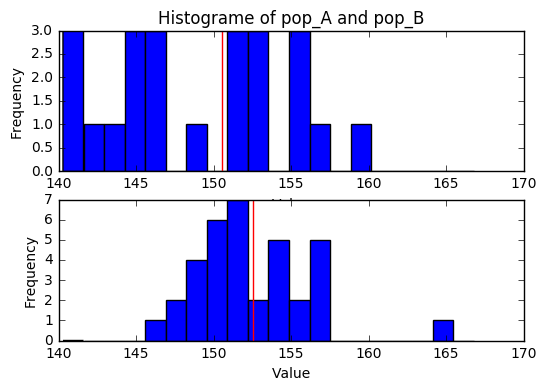

In [25]:
%matplotlib inline
def hist_plot(vec, bins):
    import matplotlib.pyplot as plt
    from statistics import mean
    plt.hist(vec, bins = bins)
    plt.axvline(mean(vec), color = 'red')
    plt.ylabel('Frequency')
    plt.xlabel('Value')
    
def plot_pop(a, b, cols=['pop_A', 'pop_B'], nbins = 20):
    import matplotlib.pyplot as plt
    minx = min([min(a), min(b)])
    maxx = max([max(a), max(b)])
    stepx = (maxx - minx)/(nbins + 1)
    bins = [minx + i * stepx for i in range(nbins + 1)]
    plt.subplot(2, 1, 1) # The first plot
    hist_plot(a, bins)
    plt.title('Histograme of ' + cols[0] + ' and ' + cols[1])
    plt.subplot(2, 1, 2) # The next plot
    hist_plot(b, bins)

plot_pop(pop_A, pop_B)    

Notice that the values of the distributions of these populations overlap quite a bit and the means are close. The question is, are these differences significant.  

You can now compute the two-sided t-test to determine if the difference of means is significant. A number of summary statistics are computed and printed for the test. 

The two-sided t-test is used to determine we can reject the null hypthesis that the difference of means is not significant. You can execute the t-test and see the results by executing the code in the cell below.

In [26]:
def t_test(a, b, alpha, alternative='two-sided'):
    from scipy import stats
    import scipy.stats as ss
    import pandas as pd
    import statsmodels.stats.weightstats as ws
    
    diff = a.mean() - b.mean()

    res = ss.ttest_ind(a, b)
      
    means = ws.CompareMeans(ws.DescrStatsW(a), ws.DescrStatsW(b))
    confint = means.tconfint_diff(alpha=alpha, alternative=alternative, usevar='unequal') 
    degfree = means.dof_satt()

    index = ['DegFreedom', 'Difference', 'Statistic', 'PValue', 'Low95CI', 'High95CI']
    return pd.Series([degfree, diff, res[0], res[1], confint[0], confint[1]], index = index)   
   

test = t_test(pop_A, pop_B, 0.05)
test

DegFreedom    32.527186
Difference    -1.975956
Statistic     -1.359749
PValue         0.179172
Low95CI       -5.254211
High95CI       1.302298
dtype: float64

Examine these statistics noticing the following:
1. Difference in means is small.
2. t-statistic is small and the p-value is large. There is a high chance that the difference in means is from random variation alone. 
3. The 95% cofidence interval straddles 0.  

Based at the above statistics we cannot reject the null hypothesis. 

The code in the cell below makes a similar plot to the ones you have already created, but with the the upper and lower confidence bounds shown as dashed lines. Execute this code and examine the results. 

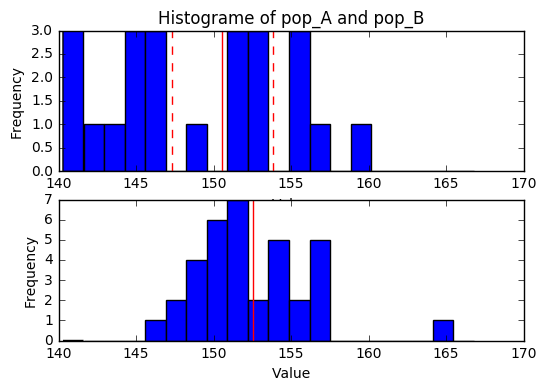

In [27]:
def hist_mean_ci(vec, t_test, bins):
    import matplotlib.pyplot as plt
    from statistics import mean
    upper = mean(vec) + t_test[5] - t_test[1]
    lower = mean(vec) + t_test[4] - t_test[1]
    plt.hist(vec, bins = bins)
    plt.axvline(mean(vec), color = 'red')
    plt.axvline(upper, color = 'red', linestyle='--')
    plt.axvline(lower, color = 'red', linestyle='--')
    plt.ylabel('Frequency')
    plt.xlabel('Value')

def plot_t(a, b, t_test, cols=['pop_A', 'pop_B'], nbins = 20):
    import matplotlib.pyplot as plt
    minx = min([min(a), min(b)])
    maxx = max([max(a), max(b)])
    stepx = (maxx - minx)/(nbins + 1)
    bins = [minx + i * stepx for i in range(nbins + 1)]
    plt.subplot(2, 1, 1) # The first plot
    hist_mean_ci(a, t_test, bins)
    plt.title('Histograme of ' + cols[0] + ' and ' + cols[1])
    plt.subplot(2, 1, 2) # The next plot
    hist_plot(b, bins)
    
plot_t(pop_A, pop_B, test)    

Notice that the mean of the population in the lower plot are within the confidence interval of the difference of means of the population. This confirms that we cannot reject the null hypothesis that there is no significant difference in these means. 

**Your Turn:** In the pervious example the difference of means was not significant. Now, you will repeat this analysis but with a slightly greater difference in means. Create two populations with means (`loc`) of `150` and `155`. Determine if this difference in means is significant using the `t_test` and `plot_t` functions.  

Examine these results and answer the following questions:
1. Based on the t-statistic, p-value, and confidence interval can you reject the null hypothesis? 
2. Does the mean of the second population fall within the confidence interval of the difference of means? 

### Power of Tests

The **power of a test** is formally defined as:

$$power = P(reject\ H_0| when\ H_a\ is\ true)$$

In pain language, the power is the probability of getting a positive result when the null hypothesis is not true. Conversely, a test with insuficient power will not detect a real effect. Clearly, we want the most powerful test we can find for the situation. 

Computing test power can be a bit complex, and analytical solutions can be dificult or impossible. Often, a simulation is used to compute power. 

Let's look at the example of compution power for the two sample t-test for the difference of means. The power of this test depends on the several parameters:

- The number of samples.
- The anticipated difference in the population means, which we call the **effect**.
- The significance level of  the test.
- The type of test.

When running a power test, you can ask several questions, which will assist you in designing an experiement. Usually, you will determine how big a sample you need to have good chance of rejecting the null hypothesis. You can also determine how big an effect needs to be given a fixed sample size (all the samples you have or can afford) to have a good chance of rejecting the null hypothesis. 

The Python `statsmodels` package provides power calculations for a limited set of hypothesis tests. We can use these capabilities to examine the powerr

The code in the cell below does the following:

- Create a sequene of effect sizes.
- Compute a vector of power values for the effect size.
- Plot the effect size vs. power. 

Execute this code and examine the result. 

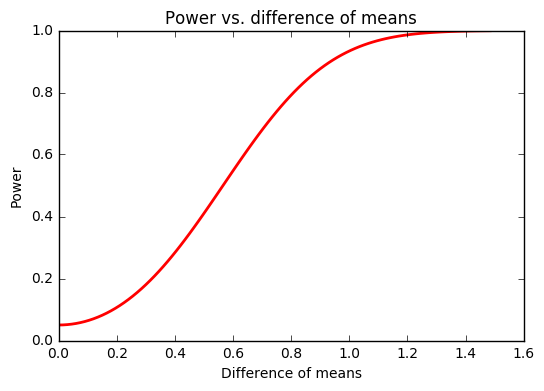

In [28]:
import statsmodels.stats.power as smsp
import numpy as np
nr.seed(seed=23344)
diffs = np.arange(start = 0.0, stop = 1.5, step = .015)
x = 25
powers = [smsp.tt_ind_solve_power(effect_size = x, nobs1 = 25, 
           alpha = 0.05, power = None, ratio = 1.0, alternative = 'two-sided') 
          for x in diffs]

def plot_power(x, y, xlabel, title):
    import matplotlib.pyplot as plt
    plt.plot(x, y, color = 'red', linewidth = 2)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Power')
plot_power(diffs, powers, xlabel = 'Difference of means', title = 'Power vs. difference of means')    

Examine these results and notice how the power of the t-test rapidly increases as the difference in means increases. At a relatively small difference in means the power of the test is approaching 1.0, the maximum possible. 

**Your turn:** In the code cell below, compute and plot 100 values of test power for significance levels in the range $\{0.001, 0.25\}$. Set `n = 25`, `d = 1.0`, for the number of samples and the difference in means.
***

Exmine the plot you have created. At a significance level of 0.20 is the power of the t-test approaching 1.0. 

***
**Your turn:** In the code cell below, compute and plot 100 values of test power for sample size in the range $\{1, 100\}$. Set `d = 1.0`, and `sig.level = 0.05`, for the difference in means and the significance level.
***

Examine the plot you have created. The power of the t-test at 20 samples is approximately what value?

### Tests on Gaulton's height data (1886)

Francis Gaulton published his seminal paper on the theory of regression in 1886. This paper has been enourmously infulential in statistics, as the linear regression model is still used today; in a different form from Gaulton's approach. 

Gaulton showed that the hights of members of a family 'regress to the mean', and that the height of the parents does not determine the hights of their adult childern. In this exercise, we will take a different approach to analyzing these data. We will use the t-test to compare the difference in means of the hights of parents and their adult childern. 

As a first step, load the data from the .csv file provided and have a look at the first few rows of the data frame by executing the code in the cell bellow. 

In [29]:
import pandas as pd
GaltonFamilies = pd.read_csv('GaltonFamilies.csv')
GaltonFamilies.head(10)

,family,father,mother,midparentHeight,children,childNum,gender,childHeight
0,001,78.5,67.0,75.43,4,1,male,73.2
1,001,78.5,67.0,75.43,4,2,female,69.2
2,001,78.5,67.0,75.43,4,3,female,69.0
3,001,78.5,67.0,75.43,4,4,female,69.0
4,002,75.5,66.5,73.66,4,1,male,73.5
5,002,75.5,66.5,73.66,4,2,male,72.5
6,002,75.5,66.5,73.66,4,3,female,65.5
7,002,75.5,66.5,73.66,4,4,female,65.5
8,003,75.0,64.0,72.06,2,1,male,71.0
9,003,75.0,64.0,72.06,2,2,female,68.0


This data set has 9 columns:
 1. A case or row number.
 2. A unique code for each family in the sample.
 3. The height of the father in inches.
 4. The height of the mother in inches.
 5. The average height of the parents.
 6. The number of childern in the family.
 7. A code for the each unique child in the family.
 8. The gender of the child.
 9. The height of the adult child in inches. 
 
 To analyze these data we divide them into two groups based on the gender of the adult childern. The code in the cell below divides the data set, plots two histograms to compare the hights of the two samples and performs two-sided the t-test on difference of the means of these samples. 

DegFreedom     9.298860e+02
Difference     5.130122e+00
Statistic      3.137518e+01
PValue        4.681854e-148
Low95CI        4.810266e+00
High95CI       5.449979e+00
dtype: float64


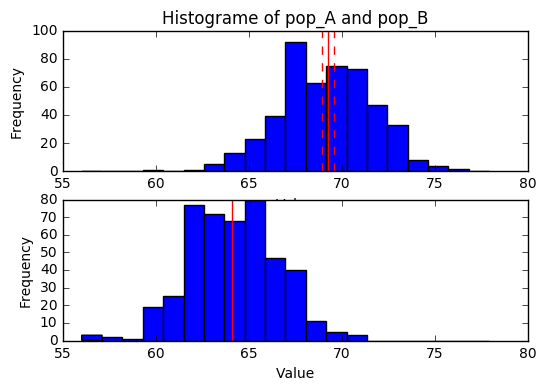

In [30]:
male = GaltonFamilies.loc[GaltonFamilies.loc[:, 'gender'] == 'male', 'childHeight']
female = GaltonFamilies.loc[GaltonFamilies.loc[:, 'gender'] == 'female', 'childHeight']

test_Galton = t_test(male, female, alpha = 0.05)
print(test_Galton)
plot_t(male, female, test_Galton)   

Examine these results noticing the following:
1. The t-statistic is large, the p-value is small and the confidence interval of the difference of the means does not overlap zero. We can reject the null hypothesis that the means are the same. There is a low chance that the difference in means is from random variation alone.
2. The mean of the second sample falls outside the confidence interval, confirming that there is a low chance that the difference in means is from random variation alone.

**Your Turn:** Compute the t-statistics and plot the histograms for the difference in means of the fathers and their adult sons. It could be the case that childern are taller than their parents. To test this idea, use the `alternative = 'larger'` argumennt of the `t_test` function. Using this argument defines a **one-sided t-test**.

Examine your results and anwer the following questions. 
1. For the one-sided test, the what is the upper bound on the confidence interval? 
2. Given the value of the t-statistic, the p-value and the confidence interval can you reject the null hypthesis? 

### Paired t-tests

There is also a version of the t-test for paired data. The heights of mothers and their adult sons is an example of paired data, since each son has a specific mother. Clasically, paired tests are used to compare data from before and after a medical treatment.

Sometimes the paired t-test is referred to as the dependent t-test. The null hypothesis is that there is no change between after the treatment. 

Execute the code in the cell below and  examine the results.

DegFreedom     9.459687e+02
Difference     5.200832e+00
Statistic      3.949802e+01
PValue        6.323181e-153
Low95CI        4.887331e+00
High95CI       5.514333e+00
dtype: float64


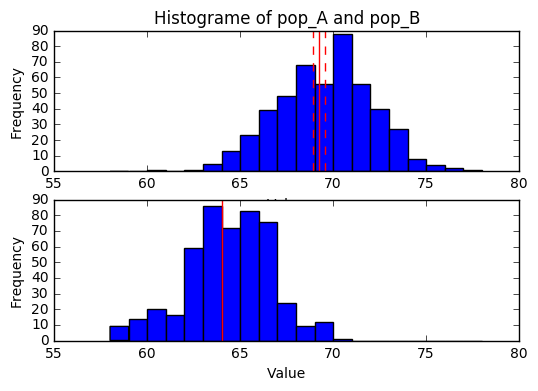

In [31]:
## Welche's test for paired data
def t_test_paired(a, b, alpha, alternative='two-sided'):
    from scipy import stats
    import scipy.stats as ss
    import pandas as pd
    import statsmodels.stats.weightstats as ws
    
    diff = np.mean([x - y for x,y in zip(a,b)])
    res = ss.ttest_rel(a, b)
      
    means = ws.CompareMeans(ws.DescrStatsW(a), ws.DescrStatsW(b))
    confint = means.tconfint_diff(alpha=alpha, alternative=alternative, usevar='unequal') 
    degfree = means.dof_satt()

    index = ['DegFreedom', 'Difference', 'Statistic', 'PValue', 'Low95CI', 'High95CI']
    return pd.Series([degfree, diff, res[0], res[1], confint[0], confint[1]], index = index)   
   
mother = GaltonFamilies.loc[GaltonFamilies.loc[:, 'gender'] == 'male', 'mother']
Galton_paired = t_test_paired(male, mother, alpha = 0.05)
print(Galton_paired)
plot_t(male, mother, Galton_paired) 

***
**Your turn:** You have seen that we cannot reject the null hypothesis for a difference in means of the fathers and their sons, which was only about `0.1`. It could be that this is an issue with test power. 

In the code cell below use the `pwr.t2n.test` function to plot 100 values of the difference in means in the range $\{0.0, 1.0 \}$. The sample size arguments to this function are `n1 and n2`, and the `sig.level - 0.05`. 

Execute your code and examine the results. How big should the difference be to have a power or 0.9? 
***

Examine your plot. With a difference in means of 0.3 approximately what is the power of the test? 

## Clasical Tests and Big Data

With the increasing scale of data sets in the 21st Century, problems with the correct applicaton of classical tests have been amplified. The primary issue is with false positives, or **Type I errors**. This problem is known as the problem of **multiple comparisons** or **base rate fallacy**. 

To understand this problem lets look at a simple example. If we have 7 groups, there are 21 possible interactions between the groups. If we use a t-test with a significance level of 0.05, we expect there to be one false positive, even if the null hypothesis is true in all cases. 

These problems grow as the number of groups grow. As an example, consider classifing several millions objects from images. 

When there are relatively few groups with a great many cases there is no problem. The test will have ample power.

With large numbers of groups, there is a high probability of getting a false positive, or type I error, with ANOVA. Without any way to know which groups are different, it is nearly impossible to determine which group may or may not be different from the rest of the population. This is a manifestation of the base rate fallacy. 

### Bonfirroni correction  

Several adjustments to the multiple comparisons problem have been proposed. In 1979 Holm published a method know as the **Bonfirroni correction**. The adjustment is simple:

$$\alpha_b = \frac{\alpha}{m}\\
with\\ 
m =\ number\ of\ groups$$

The problem with the Bonfirroni correction is the reduction in power as the  grows smaller. For big data problems with large numbers of groups, this issue can be especially serious. 

### Confidence and credible intervals

Another approach to the base rate falacy problem is to use **confidence intervals**. For example, one can compute the confidence intervals of the distributions of differences of means between groups. We have just seen an example with Tukeys HSD method. 

Interpretation of confidence intervals is quite straight forward, especailly when compared to p-values. If the confidence intervals for the difference in means do not overlap 0 the difference in means is significant. 

The confidence intervals can be adjusted analogously to the Bonfirroni correction. This process does not have the problem with the reduction in power.   

Yet another approach is to use the Bayesian **credible interval**. While the computation is different, the intrepretation is intuitive, and analogous to interpretation of confidence intervals. 

## Hypothesis Testing Summary

- If data is normal:
  - If you know population mean and variance, use standard normal ‘z-test’.
  - If you just know population mean, use t-test.
  - If you don't know the mean and variance, use Welch’s t-test.
  - Tests for paired and unpaired data.

## Summary

We have covered lot of ground in this lesson. Specifically we have discussed:

- Mean comparison tests in the form of the t-test. In this case, the null hypothesis is that there is no significant difference in means and the samples are from the same popuolation.  
- The $\chi$-squared test for count data. The null hypothesis is that there is no significant differences in the countsand the samples are from the same popuolation. 
- Distribution comparison tests in the form of the K-S test. The null hypothesis is that the two distributions are the same. 
- Variance comparison test for multiple grouped in the form of ANOVA. The null hypothesis is that there are no differences in the variances of the samples and they are all from the same population. 
- The meaning of the p-value or significance level. A p-value is the probability of obtaining an effect at least as extreme as the one in your sample data, assuming the null hypothesis is true.
- Power of tests. The power of a test is the probability of getting a positive result when the null hypothesis is not true. 
- Multiple compairison issues with applying tests to big data problems. 

## Suplementary Material

If you need some review of the concepts of classical statistics there are numerous good books available. Two particuarly non-mathematical and readable books are shown below. These books have distinct and diferent styles. If you do not like one, you might like the other. Or, you may benefit from reading both. 

Alex Reinhart's book, *Statistics Done Wrong, a woefully complete guide*, No Starch Press, 2015, disscusses clasical statistical tests using numerious clever examples. 

![](img/StatsDoneWrong.jpg)

Andrew Vicker's *What is a P-Value Anyway*, Pearson, 2009, is perhaps the most humorous statistics book ever writen; admittidly a category with little competition. The treatment is a bit broader than Reinhart's book. 

![](img/p-value.jpg)
